In [1]:
from util.util_print import plot_refacc
import json
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
from mlxtend.plotting import plot_confusion_matrix

In [2]:
evaluate_list = list(sorted(os.listdir('/home/qimin/Downloads/eval_all/')))

# 1. Baseline classifier performance

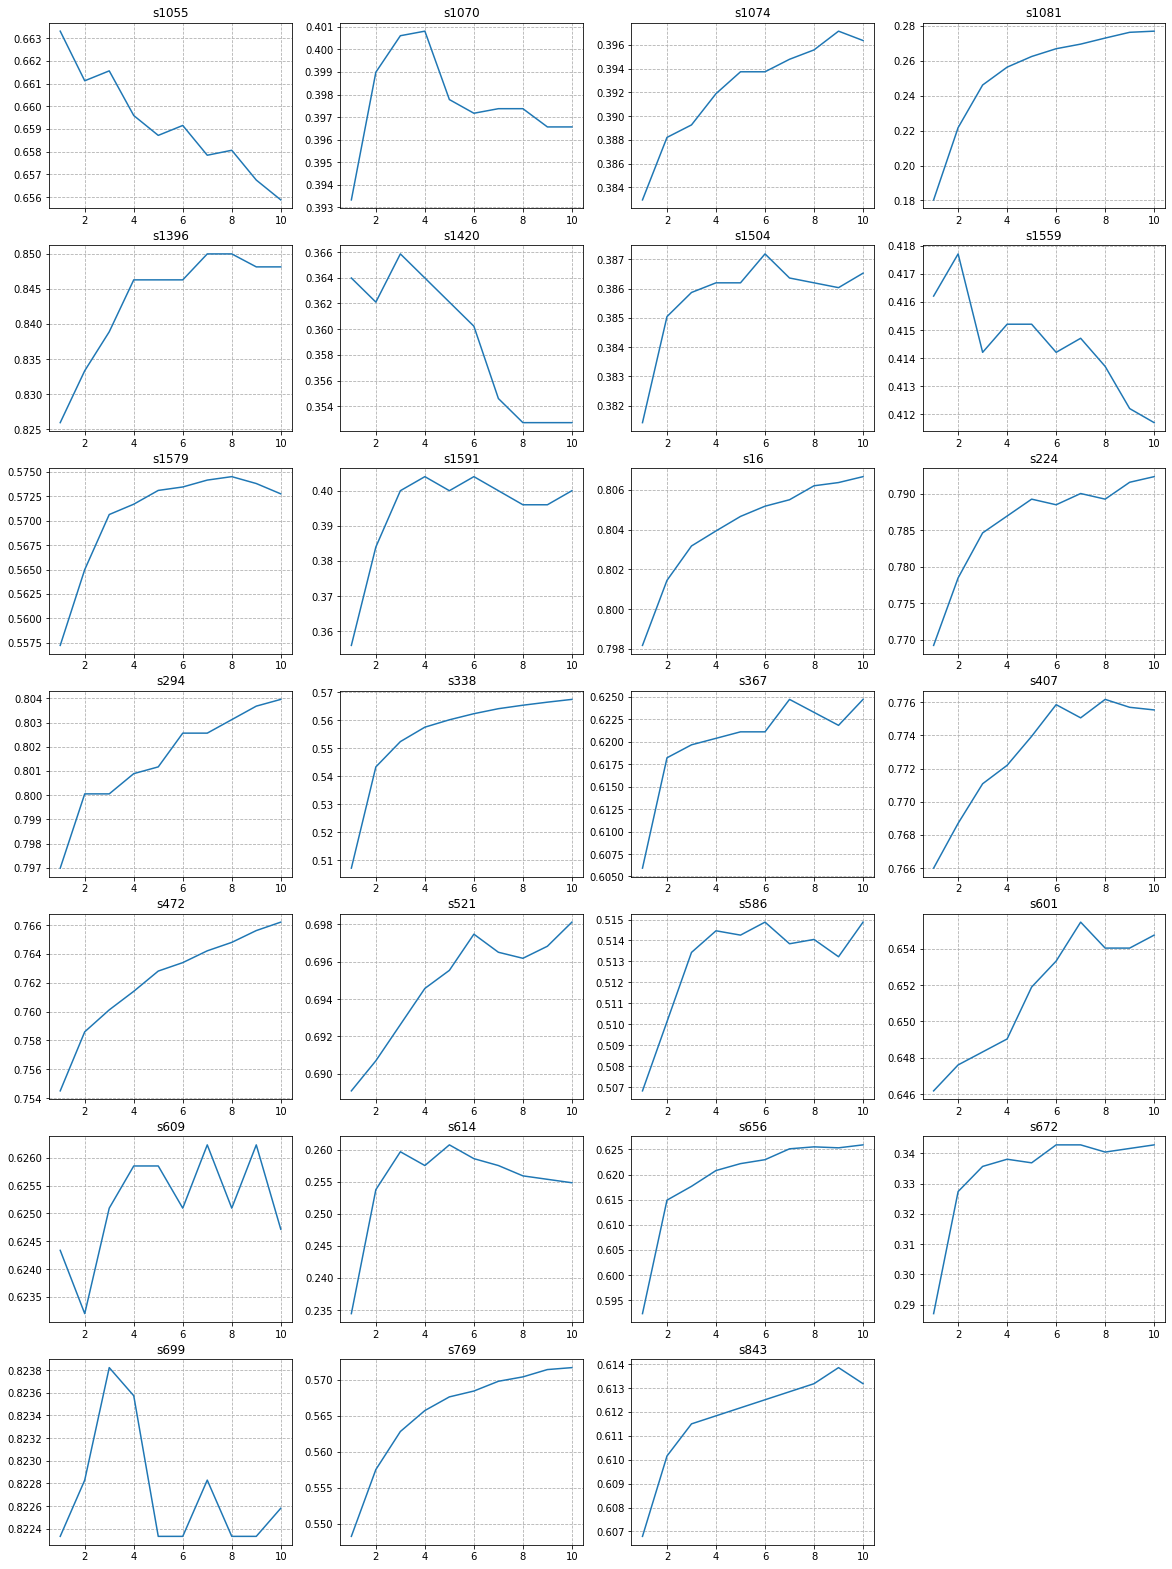

In [3]:
plt.figure(figsize=(20, 28))
for i in range(len(evaluate_list)):
    filename = '/home/qimin/Downloads/eval_all/' + evaluate_list[i]
    with open(filename, 'r') as f:
        status = json.load(f)
    plt.subplot(7,4,i+1)
    refacc = status['refacc']
    plt.plot(list(range(1, len(refacc) + 1)), refacc)
    plt.title(evaluate_list[i].split('.')[0])
    plt.grid(True, ls='--', lw=0.8)

# 2. Baseline classifier accuracy

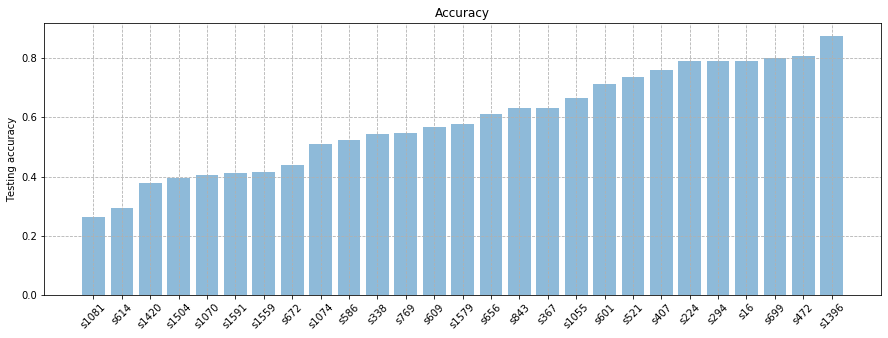

In [4]:
test_acc = []
x_tick = [i.split('.')[0] for i in evaluate_list]
for i in range(len(evaluate_list)):
    filename = '/home/qimin/Downloads/eval_all/' + evaluate_list[i]
    with open(filename, 'r') as f:
        status = json.load(f)
    test_acc.append(sum(status['acc'])/len(status['acc']))
x = [i for i, _ in sorted(zip(test_acc, x_tick), key=lambda pair: pair[0])]
y = [i for _, i in sorted(zip(test_acc, x_tick), key=lambda pair: pair[0])]
plt.figure(figsize=(15, 5))
plt.bar(list(range(len(evaluate_list))), x, align='center', alpha=0.5)
plt.xticks(list(range(len(evaluate_list))), y, rotation=45)
plt.ylabel('Testing accuracy')
plt.title('Accuracy')
plt.grid(True, ls='--', lw=0.8)
plt.show()

In [40]:
def classifier_acc(file):
    with open(file, 'r') as f:
        data = json.load(f)
    return sum(data['acc'])/len(data['acc'])

In [65]:
s294, s338, s1055, s1070, s1579 = [], [], [], [], []
for t in ['train1', 'train2', 'train3', 'train4', 'train5']:
    s294.append(classifier_acc(os.path.join('/home/qimin/Downloads/eval_5s', t, 's294/status.json')))
    s1055.append(classifier_acc(os.path.join('/home/qimin/Downloads/eval_5s', t, 's1055/status.json')))
    s1070.append(classifier_acc(os.path.join('/home/qimin/Downloads/eval_5s', t, 's1070/status.json')))
    s1579.append(classifier_acc(os.path.join('/home/qimin/Downloads/eval_5s', t, 's1579/status.json')))
    if t in ['train1', 'train2']:
        s338.append(classifier_acc(os.path.join('/home/qimin/Downloads/eval_5s', t, 's338/status.json')))

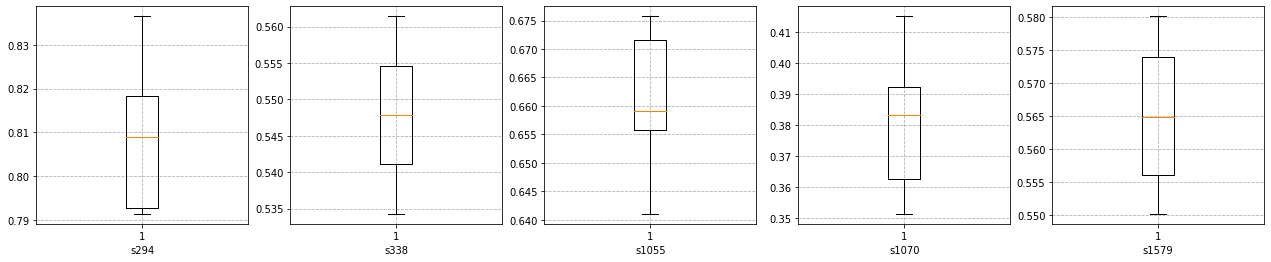

In [72]:
source = ['s294', 's338', 's1055', 's1070', 's1579']
plt.figure(figsize=(22,4))
for i, s in enumerate([s294, s338, s1055, s1070, s1579]):
    plt.subplot(1,5,i+1)
    plt.boxplot(s)
    plt.xlabel(source[i])
    plt.grid(True, ls='--', lw=0.8)
plt.show()

# 3. EfficientNet-b0 - max learning tuning

In [5]:
lrs = ['max-lr 0.01', 'max-lr 0.05', 'max-lr 0.1', 'max-lr 0.2', 'max-lr 0.5', 'max-lr 1.0']
cl = ['red', 'orange', 'blue', 'olive', 'gold', 'gray']

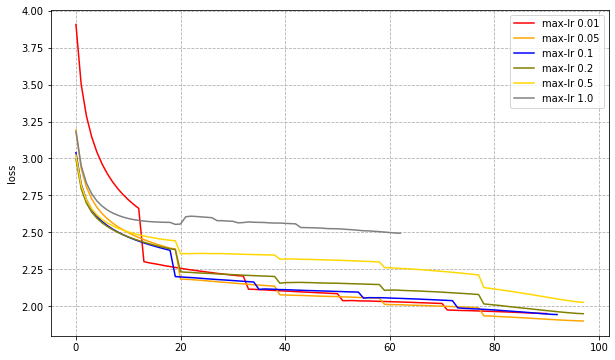

In [7]:
loss_list = list(sorted(os.listdir('/home/qimin/Downloads/loss/')))
plt.figure(figsize=(10, 6))
for i in range(len(loss_list)):
    loss = []
    filename = '/home/qimin/Downloads/loss/' + loss_list[i] + '/0/epoch_loss.csv'
    f = pd.read_csv(filename)
    for index, row in f.iterrows():
        if row['phase'] == 'train':
            loss.append(row['loss'])
    plt.plot(loss, label=lrs[i], color=cl[i])
    plt.ylabel('loss')
    plt.grid(True, ls='--', lw=0.8)
    plt.legend()

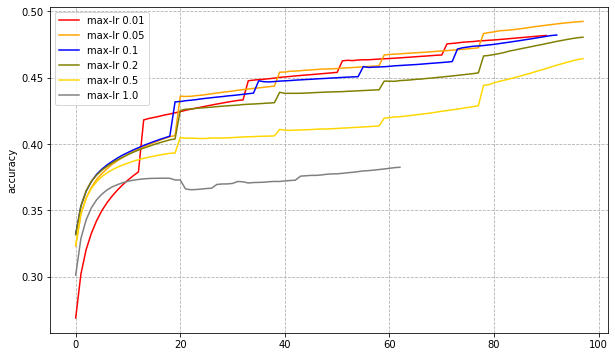

In [13]:
loss_list = list(sorted(os.listdir('/home/qimin/Downloads/loss/')))
plt.figure(figsize=(10, 6))
for i in range(len(loss_list)):
    acc = []
    filename = '/home/qimin/Downloads/loss/' + loss_list[i] + '/0/epoch_loss.csv'
    f = pd.read_csv(filename)
    for index, row in f.iterrows():
        if row['phase'] == 'train':
            acc.append(row['accuracy'])
    plt.plot(acc, label=lrs[i], color=cl[i])
    plt.ylabel('accuracy')
    plt.grid(True, ls='--', lw=0.8)
    plt.legend()

# 4. EfficientNet-b0 - epoch tuning

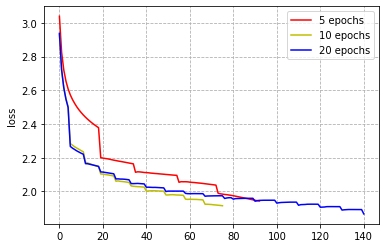

In [8]:
loss_5eps = []
filename = '/home/qimin/Downloads/loss/efficientnet_b0_coralnet_nautilus_0.05_5eps_01maxlr/0/epoch_loss.csv'
f = pd.read_csv(filename)
for index, row in f.iterrows():
    if row['phase'] == 'train':
        loss_5eps.append(row['loss'])
loss_10eps = []
filename = '/home/qimin/Downloads/loss/efficientnet_b0_coralnet_nautilus_0.05_10eps_01maxlr/0/epoch_loss.csv'
f = pd.read_csv(filename)
for index, row in f.iterrows():
    if row['phase'] == 'train':
        loss_10eps.append(row['loss'])
loss_20eps = []
filename = '/home/qimin/Downloads/loss/efficientnet_b0_coralnet_nautilus_0.05_20eps_01maxlr/0/epoch_loss.csv'
f = pd.read_csv(filename)
for index, row in f.iterrows():
    if row['phase'] == 'train':
        loss_20eps.append(row['loss'])
plt.plot(loss_5eps, label='5 epochs', color='r')
plt.plot(loss_10eps, label='10 epochs', color='y')
plt.plot(loss_20eps, label='20 epochs', color='b')
plt.ylabel('loss')
plt.grid(True, ls='--', lw=0.8)
plt.legend()

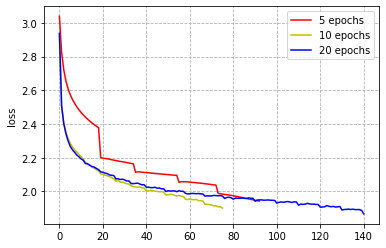

In [19]:
loss_5eps = []
filename = '/home/qimin/Downloads/loss/efficientnet_b0_coralnet_nautilus_0.05_5eps_01maxlr/0/epoch_loss.csv'
f = pd.read_csv(filename)
for index, row in f.iterrows():
    if row['phase'] == 'train':
        loss_5eps.append(row['loss'])
loss_10eps = []
filename = '/home/qimin/Downloads/loss/efficientnet_b0_coralnet_nautilus_0.05_10eps_01maxlr/0/epoch_loss.csv'
f = pd.read_csv(filename)
for index, row in f.iterrows():
    if row['phase'] == 'train':
        loss_10eps.append(row['batch_loss'])
loss_20eps = []
filename = '/home/qimin/Downloads/loss/efficientnet_b0_coralnet_nautilus_0.05_20eps_01maxlr/0/epoch_loss.csv'
f = pd.read_csv(filename)
for index, row in f.iterrows():
    if row['phase'] == 'train':
        loss_20eps.append(row['batch_loss'])
plt.plot(loss_5eps, label='5 epochs', color='r')
plt.plot(loss_10eps, label='10 epochs', color='y')
plt.plot(loss_20eps, label='20 epochs', color='b')
plt.ylabel('loss')
plt.grid(True, ls='--', lw=0.8)
plt.legend()

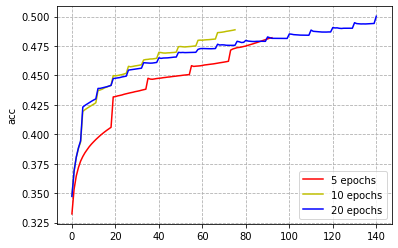

In [9]:
acc_5eps = []
filename = '/home/qimin/Downloads/loss/efficientnet_b0_coralnet_nautilus_0.05_5eps_01maxlr/0/epoch_loss.csv'
f = pd.read_csv(filename)
for index, row in f.iterrows():
    if row['phase'] == 'train':
        acc_5eps.append(row['accuracy'])
acc_10eps = []
filename = '/home/qimin/Downloads/loss/efficientnet_b0_coralnet_nautilus_0.05_10eps_01maxlr/0/epoch_loss.csv'
f = pd.read_csv(filename)
for index, row in f.iterrows():
    if row['phase'] == 'train':
        acc_10eps.append(row['accuracy'])
acc_20eps = []
filename = '/home/qimin/Downloads/loss/efficientnet_b0_coralnet_nautilus_0.05_20eps_01maxlr/0/epoch_loss.csv'
f = pd.read_csv(filename)
for index, row in f.iterrows():
    if row['phase'] == 'train':
        acc_20eps.append(row['accuracy'])
plt.plot(acc_5eps, label='5 epochs', color='r')
plt.plot(acc_10eps, label='10 epochs', color='y')
plt.plot(acc_20eps, label='20 epochs', color='b')
plt.ylabel('acc')
plt.grid(True, ls='--', lw=0.8)
plt.legend()

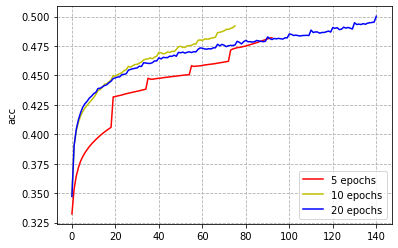

In [21]:
acc_5eps = []
filename = '/home/qimin/Downloads/loss/efficientnet_b0_coralnet_nautilus_0.05_5eps_01maxlr/0/epoch_loss.csv'
f = pd.read_csv(filename)
for index, row in f.iterrows():
    if row['phase'] == 'train':
        acc_5eps.append(row['accuracy'])
acc_10eps = []
filename = '/home/qimin/Downloads/loss/efficientnet_b0_coralnet_nautilus_0.05_10eps_01maxlr/0/epoch_loss.csv'
f = pd.read_csv(filename)
for index, row in f.iterrows():
    if row['phase'] == 'train':
        acc_10eps.append(row['batch_acc'])
acc_20eps = []
filename = '/home/qimin/Downloads/loss/efficientnet_b0_coralnet_nautilus_0.05_20eps_01maxlr/0/epoch_loss.csv'
f = pd.read_csv(filename)
for index, row in f.iterrows():
    if row['phase'] == 'train':
        acc_20eps.append(row['batch_acc'])
plt.plot(acc_5eps, label='5 epochs', color='r')
plt.plot(acc_10eps, label='10 epochs', color='y')
plt.plot(acc_20eps, label='20 epochs', color='b')
plt.ylabel('acc')
plt.grid(True, ls='--', lw=0.8)
plt.legend()

# 5. Efficient-b0 vs. Efficient-b4 vs. ResNet50 vs. ResNet101

In [2]:
def read_static(file):
    loss, acc = [], []
    f = pd.read_csv(file)
    for index, row in f.iterrows():
        if row['phase'] == 'train':
            loss.append(row['batch_loss'])
            acc.append(row['batch_acc'])
    return loss, acc

In [22]:
def axesplot(axes, row, col, stat, labels, title, colors=['r', 'y', 'b', 'g', 'black']):
    for i, s in enumerate(stat):
        axes[row, col].plot(s, label=labels[i], color=colors[i])
    axes[row, col].title.set_text(title)
    axes[row, col].grid(True, ls='--', lw=0.8)
    axes[row, col].legend()

In [7]:
# 224
effb0_loss, effb0_acc = read_static('/home/qimin/Downloads/loss/224/efficientnet_b0_coralnet_nautilus_0.05_10eps_01maxlr/0/epoch_loss.csv')
res50_loss, res50_acc = read_static('/home/qimin/Downloads/loss/224/resnet_resnet50_coralnet_nautilus_0.05_10eps_01maxlr/0/epoch_loss.csv')
re101_loss, re101_acc = read_static('/home/qimin/Downloads/loss/224/resnet_resnet101_coralnet_nautilus_0.05_10eps_01maxlr/0/epoch_loss.csv')
# 168
effb0_loss_168, effb0_acc_168 = read_static('/home/qimin/Downloads/loss/168/efficientnet_b0_coralnet_nautilus_0.05_10eps_01maxlr/0/epoch_loss.csv')
res50_loss_168, res50_acc_168 = read_static('/home/qimin/Downloads/loss/168/resnet_resnet50_coralnet_nautilus_0.05_10eps_01maxlr/0/epoch_loss.csv')

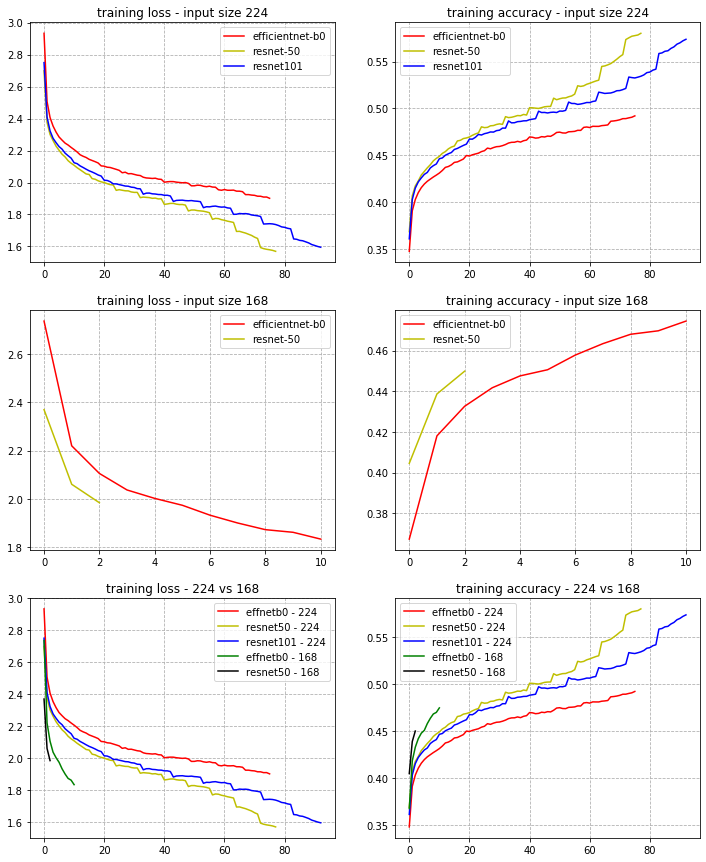

In [28]:
labels = ['efficientnet-b0', 'resnet-50', 'resnet101']
labelss = ['effnetb0 - 224', 'resnet50 - 224', 'resnet101 - 224', 'effnetb0 - 168', 'resnet50 - 168']
fig, axes = plt.subplots(3, 2, figsize=(12, 15))
axesplot(axes, 0, 0, [effb0_loss, res50_loss, re101_loss], labels, 'training loss - input size 224')
axesplot(axes, 0, 1, [effb0_acc, res50_acc, re101_acc], labels, 'training accuracy - input size 224')
axesplot(axes, 1, 0, [effb0_loss_168, res50_loss_168], labels[:2], 'training loss - input size 168')
axesplot(axes, 1, 1, [effb0_acc_168, res50_acc_168], labels[:2], 'training accuracy - input size 168')
axesplot(axes, 2, 0, [effb0_loss, res50_loss, re101_loss, effb0_loss_168, res50_loss_168], labelss,
         'training loss - 224 vs 168')
axesplot(axes, 2, 1, [effb0_acc, res50_acc, re101_acc, effb0_acc_168, res50_acc_168], labelss,
         'training accuracy - 224 vs 168')

# 6. Confusion matrix

In [8]:
with open('/home/qimin/Projects/CoralNet/data_analysis/label_set.json', 'r') as f:
    all_labels = json.load(f)

In [87]:
def get_class_name(classes):
    cls = []
    for c in classes:
        for ac in all_labels:
            if ac['id'] == c:
                cls.append(ac['name'])
                break
    return cls

def plot_cm(filename):
    s = np.load(filename)
    cm = confusion_matrix(s['gt'], s['pred'])
    cls = get_class_name(s['cls'])
    df_cm = pd.DataFrame(cm, index=cls, columns=cls)
    if len(cls) >= 40:
        plt.figure(figsize = (22,20))
    elif len(cls) >= 20 and len(cls) < 40:
        plt.figure(figsize = (18,16))
    else:
        plt.figure(figsize = (10,8))
    sn.set(font_scale=1)
    sn.heatmap(df_cm, annot=True, cmap="Greens", square=True, 
               linewidths=0.1, annot_kws={"size": 10}, fmt='g') # font size

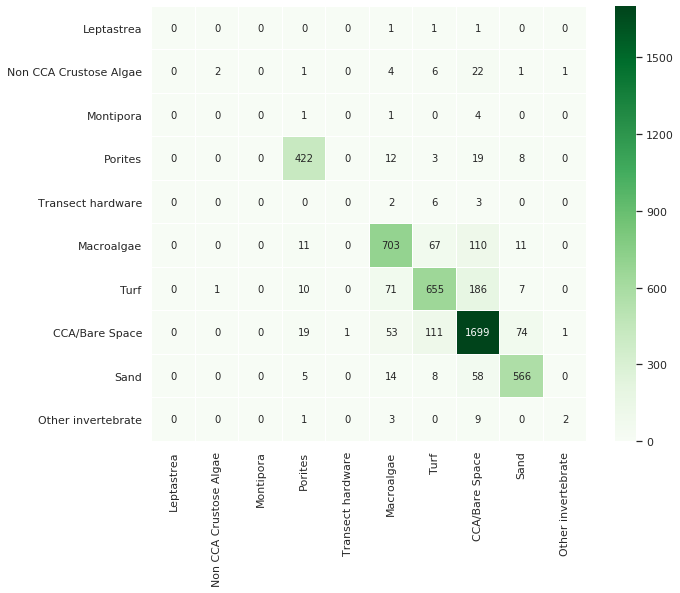

In [88]:
plot_cm('/home/qimin/Downloads/eval_5s/s294/output.npz')

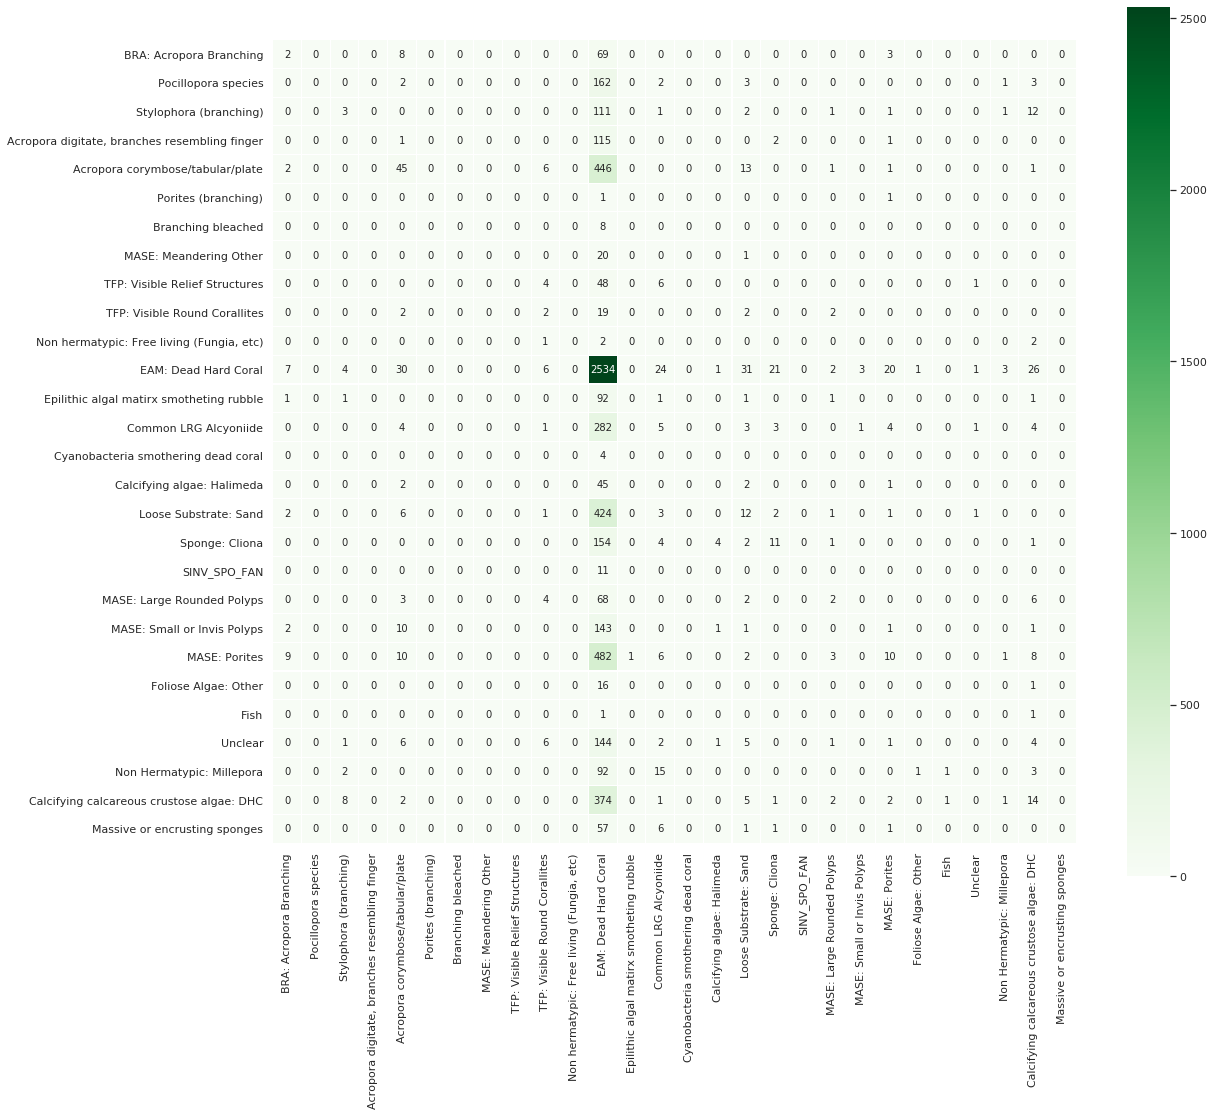

In [89]:
plot_cm('/home/qimin/Downloads/eval_5s/s1070/output.npz')

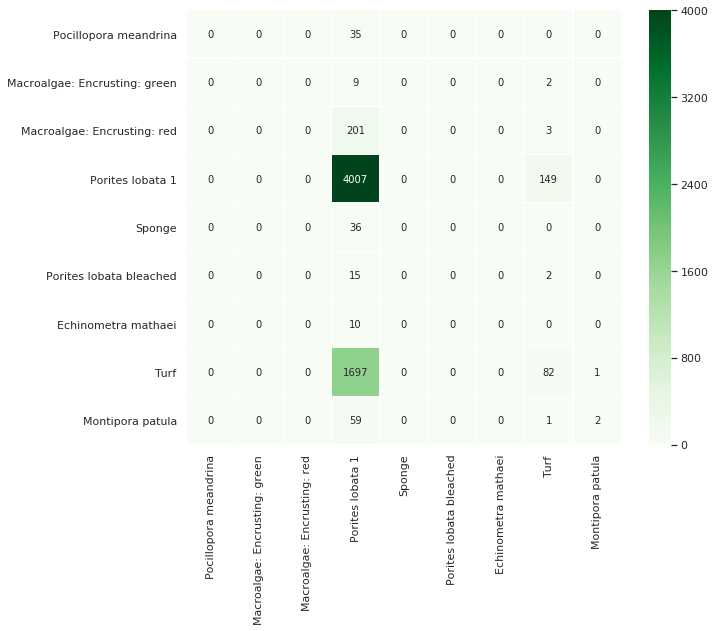

In [90]:
plot_cm('/home/qimin/Downloads/eval_5s/s1055/output.npz')

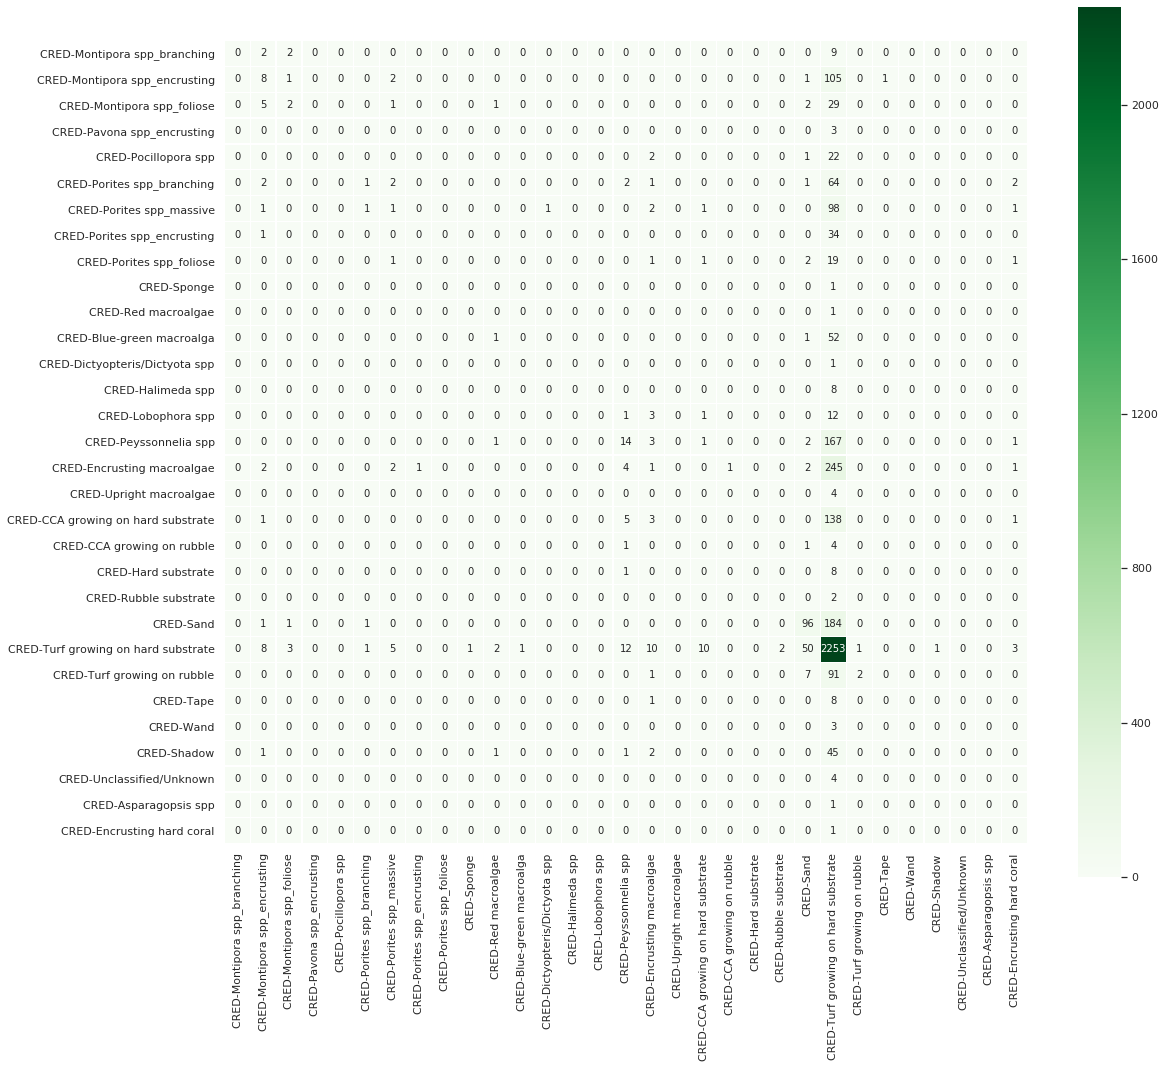

In [91]:
plot_cm('/home/qimin/Downloads/eval_5s/s1579/output.npz')

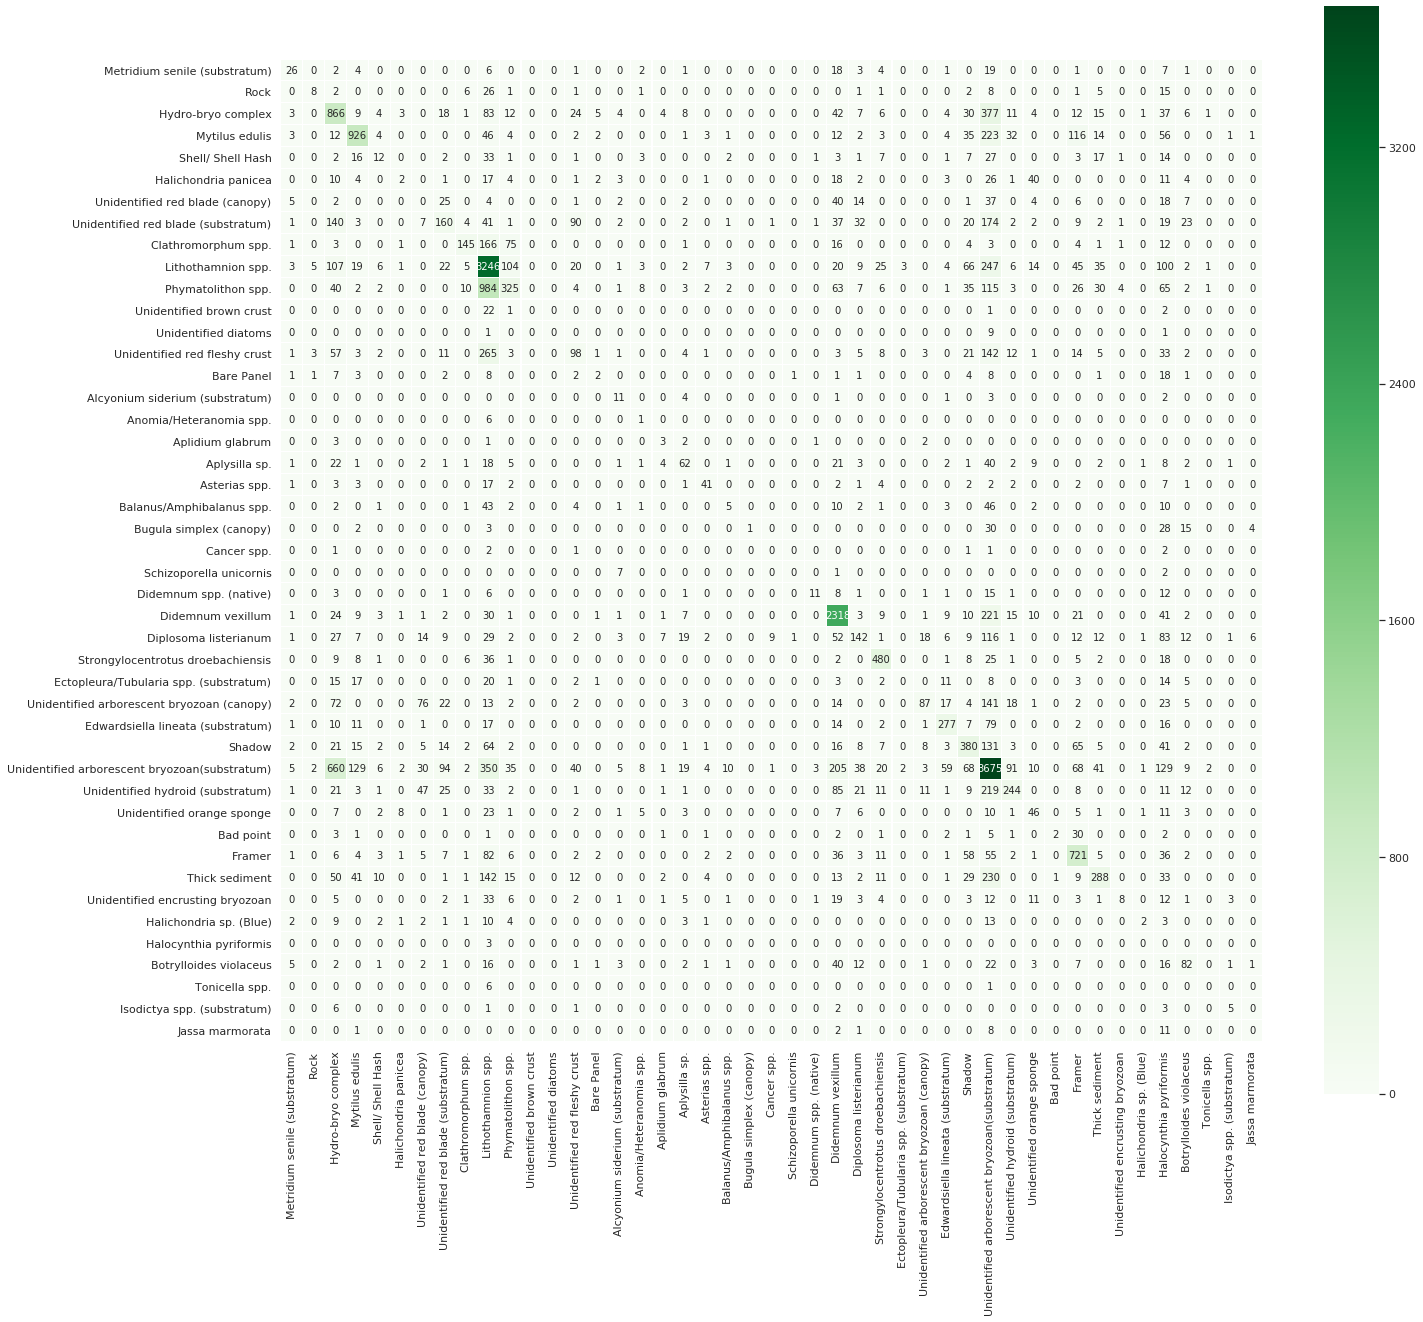

In [92]:
plot_cm('/home/qimin/Downloads/eval_5s/s338/output.npz')